**Heart Disease Prediction**

**Business Problem**

# Data Undestanding

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
path = "/content/drive/MyDrive/dataset/heart_disease.csv"
df = pd.read_csv(path)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis,Source
0,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,cleveland
1,67,1,4,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,cleveland
2,67,1,4,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,cleveland
3,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,cleveland
4,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,cleveland


loading the data and undestanding columns

| Column Name   | Meaning                 | Description                                                                                                                       |
| ------------- | ----------------------- | --------------------------------------------------------------------------------------------------------------------------------- |
| **age**       | Age                     | Age of the patient (in years)                                                                                                     |
| **sex**       | Sex                     | Gender: `1` = male, `0` = female                                                                                                  |
| **cp**        | Chest Pain Type         | Chest pain type:<br> `0`: Typical angina<br> `1`: Atypical angina<br> `2`: Non-anginal pain<br> `3`: Asymptomatic                 |
| **trestbps**  | Resting Blood Pressure  | Resting blood pressure (in mm Hg) on admission                                                                                    |
| **chol**      | Serum Cholesterol       | Serum cholesterol in mg/dl                                                                                                        |
| **fbs**       | Fasting Blood Sugar     | Fasting blood sugar > 120 mg/dl:<br> `1` = true, `0` = false                                                                      |
| **restecg**   | Resting ECG Results     | Resting electrocardiographic results:<br> `0`: Normal<br> `1`: ST-T wave abnormality<br> `2`: Left ventricular hypertrophy        |
| **thalach**   | Maximum Heart Rate      | Maximum heart rate achieved                                                                                                       |
| **exang**     | Exercise Induced Angina | Exercise-induced angina:<br> `1` = yes, `0` = no                                                                                  |
| **oldpeak**   | ST Depression           | ST depression induced by exercise relative to rest (float)                                                                        |
| **slope**     | Slope of ST Segment     | Slope of the peak exercise ST segment:<br> `0`: Upsloping<br> `1`: Flat<br> `2`: Downsloping                                      |
| **ca**        | Number of Major Vessels | Number of major vessels colored by fluoroscopy (0–3)                                                                              |
| **thal**      | Thalassemia             | Type of thalassemia:<br> `1`: Normal<br> `2`: Fixed defect<br> `3`: Reversible defect                                             |
| **diagnosis** | Target / Output         | Presence of heart disease:<br> `0`: No disease<br> `1` to `4`: Varying levels of disease (often grouped as `1` = disease present) |
| **Source**    | Source Info             | Where the data was collected (optional column, may not be in all datasets)                                                        |


In [ ]:
df.shape

(920, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        920 non-null    int64  
 1   sex        920 non-null    int64  
 2   cp         920 non-null    int64  
 3   trestbps   861 non-null    float64
 4   chol       890 non-null    float64
 5   fbs        830 non-null    float64
 6   restecg    918 non-null    float64
 7   thalach    865 non-null    float64
 8   exang      865 non-null    float64
 9   oldpeak    858 non-null    float64
 10  slope      611 non-null    float64
 11  ca         309 non-null    float64
 12  thal       434 non-null    float64
 13  diagnosis  920 non-null    int64  
 14  Source     920 non-null    object 
dtypes: float64(10), int64(4), object(1)
memory usage: 107.9+ KB


basic info about the columns such as dtype.

In [ ]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,float64
chol,float64
fbs,float64
restecg,float64
thalach,float64
exang,float64
oldpeak,float64


checking the dtypes in the dataset.

shape function is used to determine the rows and columns i.e shape of the dataset.So 920 rows , 15 columns.

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
count,920.000000,920.000000,920.000000,861.000000,890.000000,830.000000,918.000000,865.000000,865.000000,858.000000,611.000000,309.000000,434.000000,920.000000
mean,53.510870,0.789130,3.250000,132.132404,199.130337,0.166265,0.604575,137.545665,0.389595,0.878788,1.770867,0.676375,5.087558,0.995652
std,9.424685,0.408148,0.930969,19.066070,110.780810,0.372543,0.805827,25.926276,0.487941,1.091226,0.619256,0.935653,1.919075,1.142693
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


describe function is used to show statistical summary of the dataset.

In [ ]:
df.duplicated().sum()

np.int64(2)

In [ ]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis,Source
613,58,1,3,150.0,219.0,0.0,1.0,118.0,1.0,0.0,NaN,NaN,NaN,2,va
728,49,0,2,110.0,NaN,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0,hungarian


-->The rows that appeared to be "duplicates" only
have missing values in columns like slope, ca, and thal.

-->The rest of the columns have different patient information, so they are not actual duplicates.

# Data Preprocessing

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis,Source
0,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,cleveland
1,67,1,4,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,cleveland
2,67,1,4,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,cleveland
3,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,cleveland
4,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,cleveland


In [ ]:
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x > 0 else 0)

0 → No heart disease
1–4 → Has heart disease (varying severity)

-->so we are replaceing 1-4 into 1 i.e has heart disease by using lambda function

-->or we can use replace function also like this df['diagnosis'] = df['diagnosis'].replace([1, 2, 3, 4], 1)


In [ ]:
df['Source'].value_counts()

,count
Source,
cleveland,303
hungarian,294
va,200
switzerland,123


Since we are  building a heart disease prediction model, and Source is not medically relevant to diagnosis so we are removing the source column.

In [ ]:
df = df.drop('Source',axis=1)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67,1,4,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67,1,4,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalach,55
exang,55
oldpeak,62


In [ ]:
(df.isnull().sum() / len(df)) * 100

,0
age,0.000000
sex,0.000000
cp,0.000000
trestbps,6.413043
chol,3.260870
fbs,9.782609
restecg,0.217391
thalach,5.978261
exang,5.978261
oldpeak,6.739130


as we can see the missing percentage of thal is 52 and ca is about 66,so we need to drop the entire column as the null values > 50%.

In [ ]:
newdf = df.copy()

making the copy of the original data frame df to newdf.

In [ ]:
newdf = newdf.drop(['ca','thal'],axis = 1)

In [ ]:
newdf.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,diagnosis
0,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0
1,67,1,4,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,1
2,67,1,4,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,1
3,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0
4,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0


In [ ]:
newdf['exang'].value_counts()

,count
exang,
0.0,528
1.0,337


In [ ]:
newdf['restecg'].value_counts()

,count
restecg,
0.0,551
2.0,188
1.0,179


In [ ]:
newdf['fbs'].value_counts()

,count
fbs,
0.0,692
1.0,138


In [ ]:
newdf['slope'].value_counts()

,count
slope,
2.0,345
1.0,203
3.0,63


we are doing mode imputation for 'exang' as it is 0 and 1 (counts),so it is categorical variable So, mode (most frequent value) is better for imputation.

--> 'restecg' has 0,1,2 as categorical so we will go with mode imputation.

--> 'fbs' has only 0 and 1 as counts so we will impute with mode (as it is categorical).

--> 'slope' has 0,1,2 they are categorical
1.0 = Upsloping
2.0 = Flat
3.0 = Downsloping
so mode imputation is best.

In [ ]:
newdf['exang'].fillna(newdf['exang'].mode()[0],inplace=True)
newdf['restecg'].fillna(newdf['restecg'].mode()[0],inplace = True)
newdf['fbs'].fillna(newdf['fbs'].mode()[0],inplace = True)
newdf['slope'].fillna(newdf['slope'].mode()[0],inplace = True)

<ipython-input-105-4192438923>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  newdf['exang'].fillna(newdf['exang'].mode()[0],inplace=True)
<ipython-input-105-4192438923>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

**Distribution**

In [ ]:
(newdf.isnull().sum() / len(newdf)) * 100

,0
age,0.000000
sex,0.000000
cp,0.000000
trestbps,6.413043
chol,3.260870
fbs,0.000000
restecg,0.000000
thalach,5.978261
exang,0.000000
oldpeak,6.739130


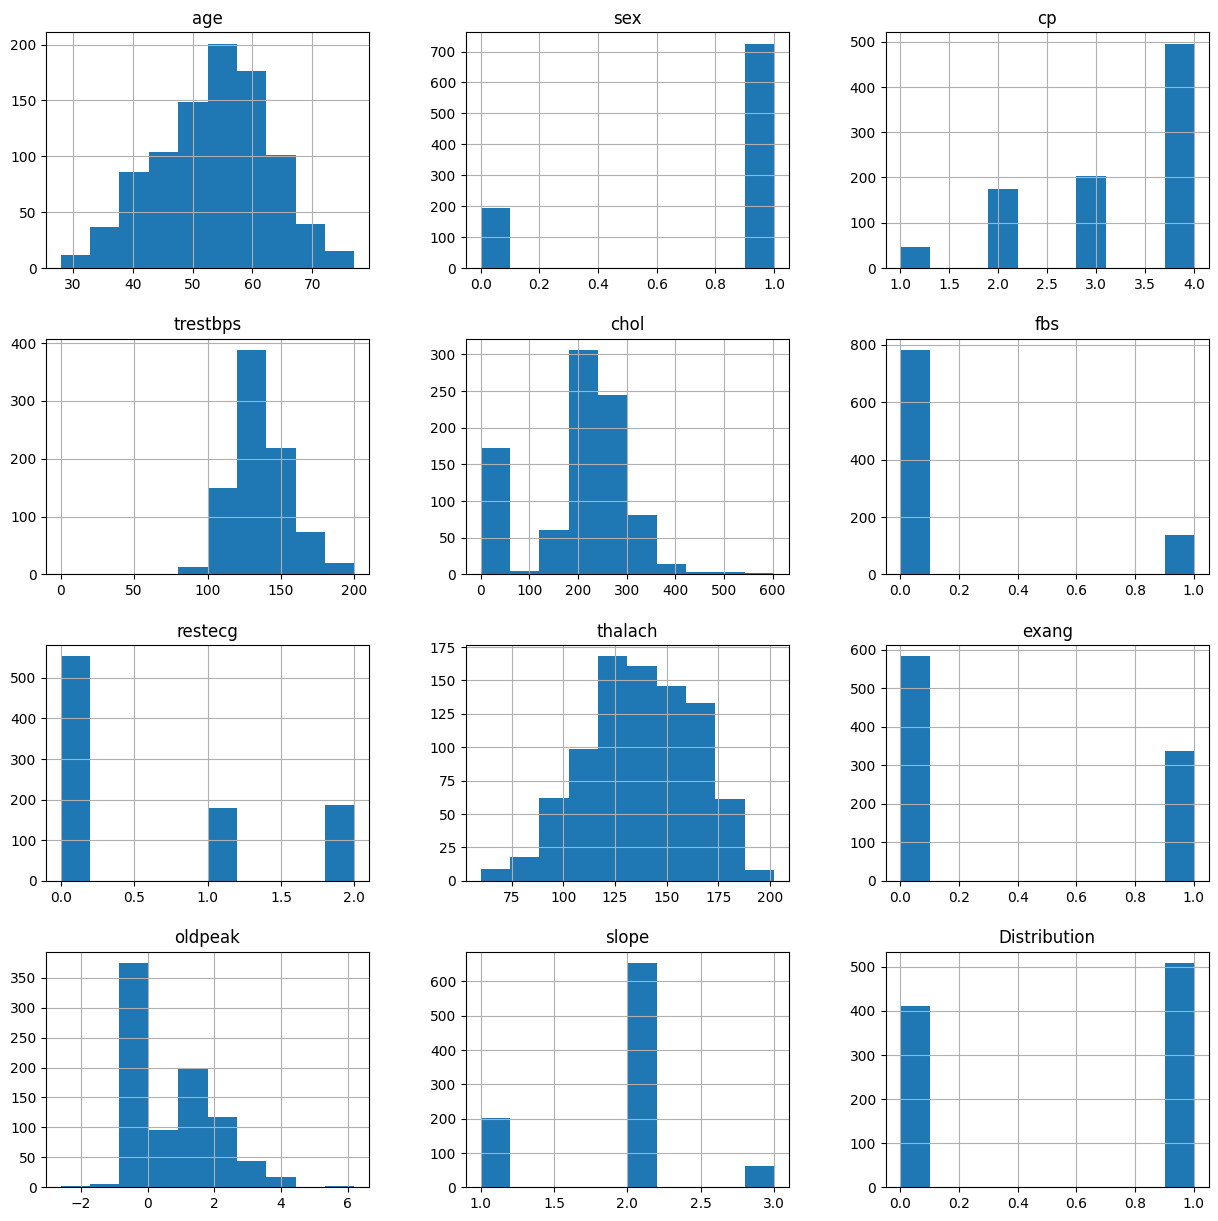

In [ ]:
newdf.hist(figsize=(15,15))
plt.title('Distribution')
plt.show()

--> trestbps,thalach are normally distributed as mean imputation will be best choice

--> chol,oldpeak are median imputation as the distribution is skewed.

In [ ]:
newdf['trestbps'].fillna(newdf['trestbps'].mean(),inplace=True)
newdf['thalach'].fillna(newdf['thalach'].mean(),inplace=True)
newdf['chol'].fillna(newdf['chol'].median(),inplace=True)
newdf['oldpeak'].fillna(newdf['oldpeak'].median(),inplace=True)

<ipython-input-108-3097238988>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  newdf['trestbps'].fillna(newdf['trestbps'].mean(),inplace=True)
<ipython-input-108-3097238988>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [ ]:
newdf.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,float64
chol,float64
fbs,float64
restecg,float64
thalach,float64
exang,float64
oldpeak,float64


In [ ]:
newdf['age'].max()

77

In [ ]:
newdf['trestbps'].max()

200.0

In [ ]:
newdf['chol'].max()

603.0

In [ ]:
newdf['thalach'].max()

202.0

**Outliers Detection & Treatment.**

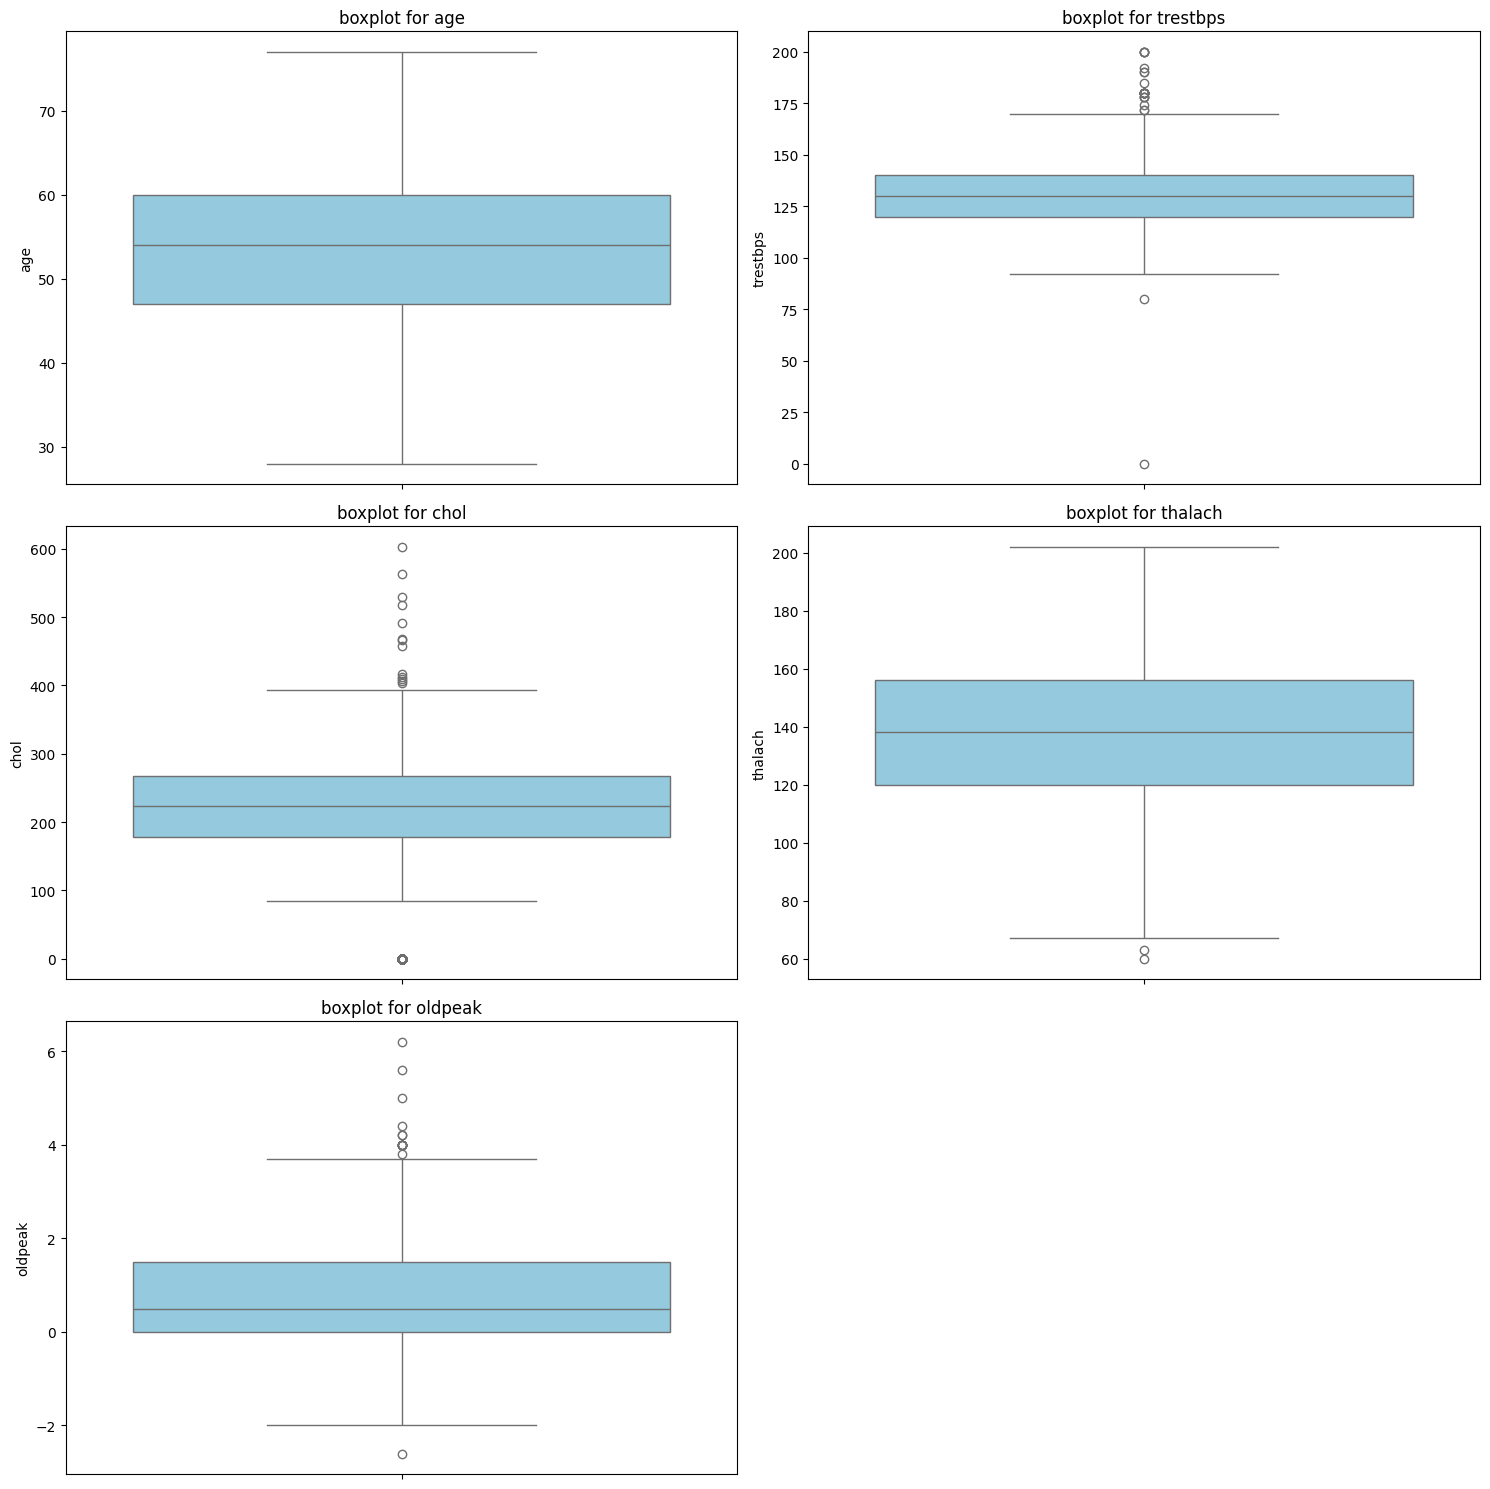

In [ ]:
numerical_features = ['age','trestbps','chol','thalach','oldpeak']
plt.figure(figsize=(15,15))
for i,col in enumerate(numerical_features,1):
  plt.subplot(3,2,i)
  sns.boxplot(y=newdf[col],color='skyblue')
  plt.title(f'boxplot for {col}')
  plt.tight_layout()
plt.show()

**Interpretation**

from the above boxplot we have outliers in trestbps,chol,oldpeak

--> from this boxplot trestbps(blood pressure) max is 200,medically they are possible,especially in hypertensive individual's.

--> chol(cholestrol) from the range of 400-600 mg/dL, we have extream values as they are very senstitive and rare cases so i prefer capping instead of removing or keeping it same.

--> oldpeak(It's a part of ECG during stress test) 0-1 normal,1-2 mild(borderline),2-4 abnormal,>4 high risk in clinical term's.So i perfer removing the outliers.


*IQR for oldpeak*

In [ ]:
# iqr for thalach

In [ ]:
cols = ['oldpeak']
for i in cols:
  q1 = newdf[i].quantile(0.25)
  q3 = newdf[i].quantile(0.75)
  iqr = q3 - q1
  upper_bound = q3 + (1.5 * iqr)
  lower_bound = q1 - (1.5 * iqr)
  newdf = newdf[(newdf[i] >= lower_bound) & (newdf[i] <= upper_bound)]
print('The original: ',df.shape)
print('After IQR: ',newdf.shape)


The original:  (920, 14)
After IQR:  (904, 12)


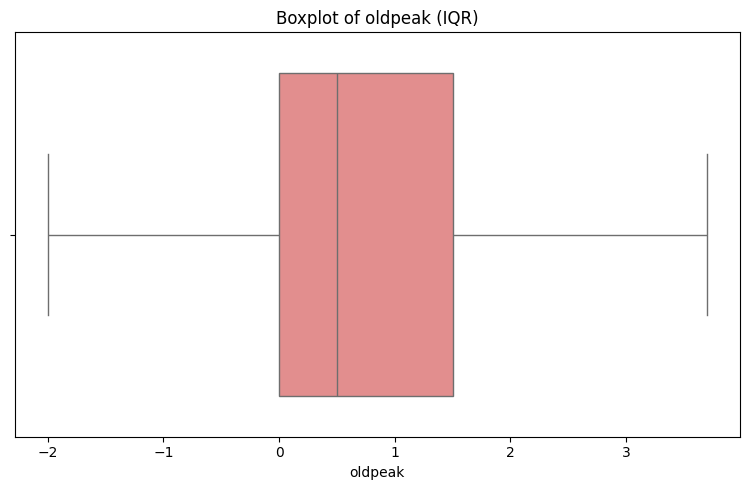

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

for i, col in enumerate(cols, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=newdf[col], color='lightcoral')
    plt.title(f'Boxplot of {col} (IQR)')

plt.tight_layout()
plt.show()


As the normal distribution for the oldpeak is skewred,So IQR is best for outlier removal.

*Capping for chol(cholestral)*

In [ ]:
# Calculate IQR
cols1 = ['chol']
for i in cols1:
 q1 = newdf[i].quantile(0.25)
 q3 = newdf[i].quantile(0.75)
 iqr = q3 - q1

# Calculate bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Cap the values
newdf[i] = newdf[i].apply(lambda x:
                                    lower_bound if x < lower_bound
                                    else upper_bound if x > upper_bound
                                    else x)

# Optional: check result
print("Min chol after capping:", newdf[i].min())
print("Max chol after capping:", newdf[i].max())

Min chol after capping: 43.5
Max chol after capping: 399.5


<ipython-input-118-472418375>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf[i] = newdf[i].apply(lambda x:


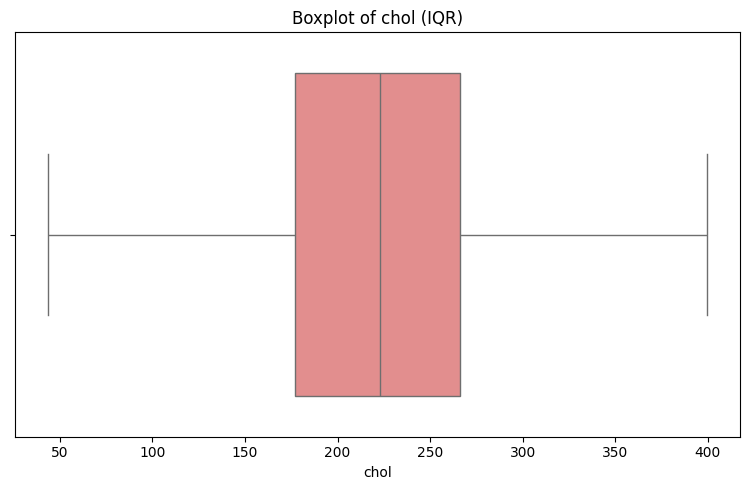

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

for i, col in enumerate(cols1, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=newdf[col], color='lightcoral')
    plt.title(f'Boxplot of {col} (IQR)')

plt.tight_layout()
plt.show()


"We capped the chol (cholesterol) values at 400 to handle extreme outliers. Values greater than 400 were considered unusually high and replaced to reduce skewness and improve model performance."

**Feature Scaling.**

In [ ]:
newdf.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,diagnosis
0,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0
1,67,1,4,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,1
2,67,1,4,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,1
3,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0
4,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0


--> "Applied feature scaling to normalize numerical columns:
Used StandardScaler for features with normal distribution:
➤ age, trestbps, thalach


Used RobustScaler for features with skewed distributions or outliers:
➤ chol, oldpeak.


This ensures consistent feature scaling, improving model convergence and performance."

*Standard Scaler (age, trestbps, thalach)*






In [ ]:
from sklearn.preprocessing import StandardScaler
Standard = StandardScaler()
newdf[['age','trestbps','thalach']] = Standard.fit_transform(newdf[['age','trestbps','thalach']])
print(newdf[['age','trestbps','thalach']].head())

        age  trestbps   thalach
0  1.014093  0.714443  0.491955
1  1.438559  1.535435 -1.176371
2  1.438559 -0.653875 -0.342208
3 -1.744936 -0.106548  1.961672
4 -1.320470 -0.106548  1.365841


*Robust Scaler(chol, oldpeak)*

In [ ]:
from sklearn.preprocessing import RobustScaler
Robust = RobustScaler()
newdf[['chol','oldpeak']] = Robust.fit_transform(newdf[['chol','oldpeak']])
print(newdf[['chol','oldpeak']].head())

       chol   oldpeak
0  0.112360  1.200000
1  0.707865  0.666667
2  0.067416  1.400000
3  0.303371  2.000000
4 -0.213483  0.600000


In [ ]:
newdf.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,diagnosis
0,1.014093,1,1,0.714443,0.112360,1.0,2.0,0.491955,0.0,1.200000,3.0,0
1,1.438559,1,4,1.535435,0.707865,0.0,2.0,-1.176371,1.0,0.666667,2.0,1
2,1.438559,1,4,-0.653875,0.067416,0.0,2.0,-0.342208,1.0,1.400000,2.0,1
3,-1.744936,1,3,-0.106548,0.303371,0.0,0.0,1.961672,0.0,2.000000,3.0,0
4,-1.320470,0,2,-0.106548,-0.213483,0.0,2.0,1.365841,0.0,0.600000,1.0,0


# **Model Devlopment**

**Train - Test  Split**

In [ ]:
X = newdf.drop('diagnosis', axis = 1)
y = newdf['diagnosis']


-->As the Target variable is diagnosis we droped diagnosis and keeping remainning columns for trainning and testing.

--> from model_selection we imported train_test_split for trainning the model.



In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42,stratify = y)


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Logistic Regression")
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Classification Report : \n",classification_report(y_test,y_pred))
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred))


Logistic Regression
Accuracy :  0.8232044198895028
Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.72      0.79        82
           1       0.80      0.91      0.85        99

    accuracy                           0.82       181
   macro avg       0.83      0.81      0.82       181
weighted avg       0.83      0.82      0.82       181

Confusion Matrix : 
 [[59 23]
 [ 9 90]]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Apply class_weight='balanced' to handle imbalance
model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Logistic Regression")
print("Accuracy : ", accuracy_score(y_test, y_pred))
print("Classification Report : \n", classification_report(y_test, y_pred))
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred))


Logistic Regression
Accuracy :  0.8066298342541437
Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.73      0.77        82
           1       0.80      0.87      0.83        99

    accuracy                           0.81       181
   macro avg       0.81      0.80      0.80       181
weighted avg       0.81      0.81      0.81       181

Confusion Matrix : 
 [[60 22]
 [13 86]]


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model2 = DecisionTreeClassifier(random_state=42)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7237569060773481
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.66      0.68        82
           1       0.73      0.78      0.75        99

    accuracy                           0.72       181
   macro avg       0.72      0.72      0.72       181
weighted avg       0.72      0.72      0.72       181

Confusion Matrix:
 [[54 28]
 [22 77]]


**KNN Classification**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model3 = KNeighborsClassifier(n_neighbors=5)
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8121546961325967
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.74      0.78        82
           1       0.80      0.87      0.83        99

    accuracy                           0.81       181
   macro avg       0.81      0.81      0.81       181
weighted avg       0.81      0.81      0.81       181

Confusion Matrix:
 [[61 21]
 [13 86]]


**SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model4 = SVC(kernel='linear')
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8232044198895028
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.74      0.79        82
           1       0.81      0.89      0.85        99

    accuracy                           0.82       181
   macro avg       0.83      0.82      0.82       181
weighted avg       0.83      0.82      0.82       181

Confusion Matrix:
 [[61 21]
 [11 88]]


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Use class_weight='balanced' to handle class imbalance
model40 = SVC(kernel='linear', class_weight='balanced', random_state=42)
model40.fit(X_train, y_train)

# Predict
y_pred = model40.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8287292817679558
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.81        82
           1       0.83      0.87      0.85        99

    accuracy                           0.83       181
   macro avg       0.83      0.82      0.83       181
weighted avg       0.83      0.83      0.83       181

Confusion Matrix:
 [[64 18]
 [13 86]]


Accuracy is 82%

confusion matrix interpretation

->61 people are healthy and correctly predicted as healthy.

->21 people are healthy but the model predicted them as having    disease.

->88 people have heart disease and were correctly predicted.

->11 people have heart disease but were wrongly predicted as healthy.

**Random Forest Classification**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model5 = RandomForestClassifier(n_estimators=100, random_state=42)
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8011049723756906
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.72      0.77        82
           1       0.79      0.87      0.83        99

    accuracy                           0.80       181
   macro avg       0.80      0.79      0.80       181
weighted avg       0.80      0.80      0.80       181

Confusion Matrix:
 [[59 23]
 [13 86]]


**XG Boost Classification**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model6 = GradientBoostingClassifier(n_estimators=100, random_state=42)
model6.fit(X_train, y_train)
y_pred = model6.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8121546961325967
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.71      0.77        82
           1       0.79      0.90      0.84        99

    accuracy                           0.81       181
   macro avg       0.82      0.80      0.81       181
weighted avg       0.82      0.81      0.81       181

Confusion Matrix:
 [[58 24]
 [10 89]]


**From the all model's svc with class balanced gave accuracy of 82% with good recall and f1 score so my model is svc is better performer than other model's**

**Deployment**

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler
import numpy as np
import pandas as pd

# 1. Input data (real-world values)
input_data = [55, 1, 3, 130, 240, 0, 2, 150, 0, 1.2, 2]  # age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope
columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope']
input_df = pd.DataFrame([input_data], columns=columns)

# 2. Apply the correct scalers to relevant columns
input_df[['age','trestbps','thalach']] = Standard.transform(input_df[['age','trestbps','thalach']])
input_df[['chol','oldpeak']] = Robust.transform(input_df[['chol','oldpeak']])

# 3. Predict using the trained model (e.g., model40 = SVC)
prediction = model40.predict(input_df)

# 4. Output
if prediction[0] == 0:
    print("✅ The person is healthy (No heart disease).")
else:
    print("⚠️ The person has heart disease.")


✅ The person is healthy (No heart disease).
